In [32]:
%matplotlib inline

import pandas as pd
from statistics import mean
import cv2
import numpy as np
from matplotlib import pyplot as plt
def getVideoFrame(name,frnum=45):
    cap= cv2.VideoCapture(name)
    i=0
    while(cap.isOpened()):
        ret, frame = cap.read()
        if i==frnum:
            return frame
        i+=1
    
def frames(name,df):
    for i,row in df.iterrows():
        fn=row['mag_file']
        frame=getVideoFrame(fn)

def getAvgMetrics(pbdf,pbhalfdf):    
    if len(pbdf)>0 and len(pbhalfdf)>0:
        result=[mean(pbdf['psnr_mag'].tolist()),
             mean(pbdf['ssim_mag'].tolist()),
             mean(pbdf['ms_ssim_mag'].tolist()),
             mean(pbdf['vmaf_mag'].tolist()),
             mean(pbdf['psnr'].tolist()),
             mean(pbdf['ssim'].tolist()),
             mean(pbdf['ms_ssim'].tolist()),
             mean(pbdf['vmaf'].tolist()),
             mean(pbhalfdf['psnr'].tolist()),
             mean(pbhalfdf['ssim'].tolist()),
             mean(pbhalfdf['ms_ssim'].tolist()),
             mean(pbhalfdf['vmaf'].tolist()),
             mean(pbdf['psnr_best'].tolist()),
             mean(pbdf['ssim_best'].tolist()),
             mean(pbdf['ms_ssim_best'].tolist()),
             mean(pbdf['vmaf_best'].tolist()),
             mean(pbhalfdf['psnr_best'].tolist()),
             mean(pbhalfdf['ssim_best'].tolist()),
             mean(pbhalfdf['ms_ssim_best'].tolist()),
             mean(pbhalfdf['vmaf_best'].tolist()),
            list(set(pbhalfdf['best_scale'].tolist()+pbdf['best_scale'].tolist())),
            list(set(pbhalfdf['best_OFwinsize'].tolist()+pbdf['best_OFwinsize'].tolist())),
            list(set(pbhalfdf['best_bilatfil_size'].tolist()+pbdf['best_bilatfil_size'].tolist()))]            
    else:
        print(pbdf)
        print(pbhalfdf)
    return result

def reformat(df):
    cols=df.columns
    mag=cols[0:4]
    sfmd=cols[4:8]
    sfmd2=cols[8:12]
    sfmb=cols[12:16]
    sfmb2=cols[16:20]
    
    formatted_cols=[mag[0].split(' ', 1)[0],
                    sfmd[0].split(' ', 1)[0],
                    sfmd2[0].split(' ', 1)[0],
                    sfmb[0].split(' ', 1)[0],
                    sfmb2[0].split(' ', 1)[0]]
    formatted=pd.DataFrame(columns=formatted_cols)
    for i,row in df.iterrows():
        m=row[mag].values
        strmag='{:.1f}/{:.3f}/{:.3f}/{:.1f}'.format(m[0],m[1],m[2],m[3])
        m=row[sfmd].values
        strsfmd='{:.1f}/{:.3f}/{:.3f}/{:.1f}'.format(m[0],m[1],m[2],m[3])
        m=row[sfmd2].values
        strsfmd2='{:.1f}/{:.3f}/{:.3f}/{:.1f}'.format(m[0],m[1],m[2],m[3])
        m=row[sfmb].values
        strsfmb='{:.1f}/{:.3f}/{:.3f}/{:.1f}'.format(m[0],m[1],m[2],m[3])
        m=row[sfmb2].values
        strsfmb2='{:.1f}/{:.3f}/{:.3f}/{:.1f}'.format(m[0],m[1],m[2],m[3])
        frow=[strmag,strsfmd,strsfmd2,strsfmb,strsfmb2]
        formatted.loc[i] = frow
    return formatted

def plotScores(df,miny=0.4, maxy=0.8, savename=None):
    cols=df.columns
    mag=cols[0:4]
    sfmd=cols[4:8]
    sfmd2=cols[8:12]
    sfmb=cols[12:16]
    sfmb2=cols[16:20]
    
    #barWidth = 0.25
    labels=[mag[0].split(' ', 1)[0],
                    sfmd[0].split(' ', 1)[0],
                    sfmb[0].split(' ', 1)[0],
                    sfmd2[0].split(' ', 1)[0],
                    sfmb2[0].split(' ', 1)[0]]
    
    x = np.arange(len(labels))
    fig, ax = plt.subplots()
    width = 0.095
    n=0
    for i,row in df.iterrows():
        if i=='octave':
            break
        barsi = [score(row[mag].values),
                 score(row[sfmd].values),
                 score(row[sfmb].values),
                 score(row[sfmd2].values),
                 score(row[sfmb2].values)]#row of dataframe
        if n==0:
            r = np.arange(len(barsi))
        else:
            r = [x + width for x in r]
        print(r)
        rects = ax.bar(r, barsi, width, label=i)
        n+=1
        
    # Add xticks on the middle of the group bars
    plt.xlabel('group', fontweight='bold')
    plt.xticks([r + width for r in range(len(barsi))], labels)
    
    ax.set_ylim([miny,maxy])
    major_ticks = np.arange(miny, maxy, 0.05)
    minor_ticks = np.arange(miny, maxy, 0.0125)

    ax.set_yticks(major_ticks)
    ax.set_yticks(minor_ticks, minor=True)
    ax.grid(which='both')
    # Create legend & Show graphic
    plt.legend(loc='best', fancybox=True, framealpha=0.5)

    plt.grid(True,axis='y',alpha=0.5, linestyle='-')
    plt.grid(b=True, which='minor',alpha=0.3, linestyle='--')
    plt.grid(True,axis='x',alpha=0.0, linestyle='')

    plt.rcParams['figure.figsize'] = [15, 6]
    #plt.figure(figsize=(15,8), dpi= 100, facecolor='w', edgecolor='k')
    

    import matplotlib.transforms
    plt.setp( ax.xaxis.get_majorticklabels()) 
    # Create offset transform by 5 points in x direction
    dx = 36/72.; dy = 0/72. 
    offset = matplotlib.transforms.ScaledTranslation(dx, dy, fig.dpi_scale_trans)
    # apply offset transform to all x ticklabels.
    for label in ax.xaxis.get_majorticklabels():
        label.set_transform(label.get_transform() + offset)

    plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True) # labels along the bottom edge are off

    if savename is not None:
        plt.savefig(savename)
    plt.show()
def score(input):
    return (input[1]+input[2]+input[3]/100)/3
#plotScores(res)

!pwd
!ls

/home/jonathan/Dropbox/UnB/motionMag/quality_3
backup		     from_ACC		  SFM_vs_DMD.png
csvs		     from_DMD		  SFM_vs_DMS.png
data_analysis.ipynb  from_DMS		  SynFlowMap_from_ACC.csv
exp_SFM_ACC_mse.py   from_PB		  SynFlowMap_from_DMD.csv
exp_SFM_ACC.py	     SearchResults.ipynb  SynFlowMap_from_DMS.csv
exp_SFM_DMD.py	     SFM_gui.py		  SynFlowMap_from_PB.csv
exp_SFM_DMS.py	     SFM_large.py	  temp_csvs
exp_SFM_PB.py	     SFM_vs_ACC.png	  tmp


54 54
Index(['Unnamed: 0', 'alpha_2', 'best_OFwinsize', 'best_bilatfil_size',
       'best_scale', 'gt_file', 'mag_file', 'ms_ssim', 'ms_ssim_best',
       'ms_ssim_mag', 'orig_file', 'pb_alpha', 'pb_settings', 'psnr',
       'psnr_best', 'psnr_mag', 'score', 'score_best', 'score_mag',
       'scorebest_OFwinsize', 'sfm_best_file', 'sfm_default_file', 'ssim',
       'ssim_best', 'ssim_mag', 'status', 'video_num', 'vmaf', 'vmaf_best',
       'vmaf_mag'],
      dtype='object')
alpha= 160
alpha= 40
alpha= 80
exp= plainBG
exp= textureBG
exp= moveX
exp= moveY
exp= moveXY
exp= octave
exp= quarter octave
[0 1 2 3 4]
[0.095, 1.095, 2.095, 3.095, 4.095]
[0.19, 1.19, 2.1900000000000004, 3.1900000000000004, 4.1899999999999995]
[0.28500000000000003, 1.285, 2.2850000000000006, 3.2850000000000006, 4.284999999999999]
[0.38, 1.38, 2.380000000000001, 3.380000000000001, 4.379999999999999]
[0.475, 1.4749999999999999, 2.475000000000001, 3.475000000000001, 4.474999999999999]
[0.57, 1.5699999999999998, 2.57

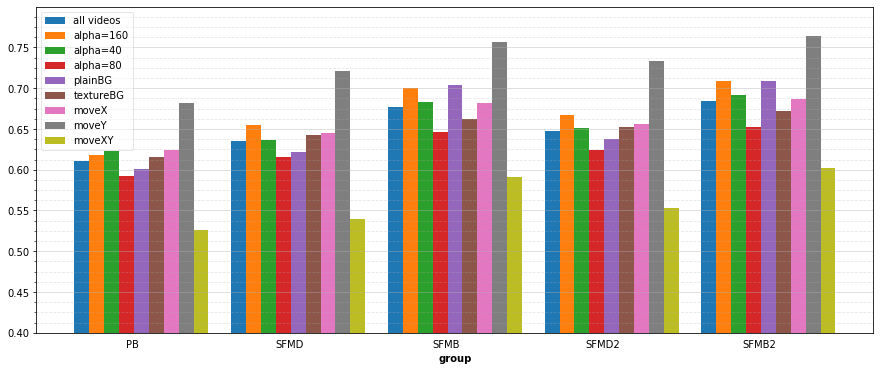

,PB,SFMD,SFMD2,SFMB,SFMB2
all videos,25.9/0.788/0.840/20.4,26.0/0.772/0.825/30.9,26.3/0.784/0.836/32.3,26.9/0.802/0.856/37.1,27.0/0.810/0.862/38.1
alpha=160,26.7/0.806/0.854/19.3,26.9/0.798/0.847/31.9,27.1/0.811/0.859/33.2,27.7/0.830/0.880/39.2,27.8/0.840/0.888/39.8
alpha=40,25.9/0.785/0.841/24.3,26.0/0.762/0.817/33.1,26.3/0.776/0.830/34.8,27.1/0.795/0.850/40.2,27.3/0.803/0.856/41.5
alpha=80,25.1/0.773/0.825/17.7,25.2/0.758/0.812/27.9,25.4/0.765/0.819/28.8,25.9/0.781/0.837/32.0,26.0/0.786/0.841/32.9
plainBG,27.8/0.822/0.869/11.0,27.6/0.804/0.847/21.6,28.0/0.816/0.859/23.7,29.6/0.860/0.901/35.1,29.7/0.862/0.903/36.0
textureBG,24.9/0.771/0.825/25.1,25.2/0.757/0.814/35.6,25.5/0.768/0.825/36.6,25.5/0.774/0.833/38.1,25.7/0.783/0.841/39.1
moveX,26.8/0.807/0.856/21.1,27.0/0.792/0.842/30.3,27.2/0.801/0.851/31.7,27.8/0.811/0.863/37.1,27.9/0.817/0.867/37.7
moveY,26.7/0.844/0.887/31.6,27.7/0.840/0.883/44.2,28.0/0.851/0.893/45.7,28.3/0.864/0.906/50.0,28.4/0.870/0.910/51.2
moveXY,24.2/0.713/0.777/8.6,23.4/0.686/0.751/18.3,23.7/0.700/0.765/19.4,24.5/0.731/0.799/24.2,24.8/0.743/0.808/25.4
octave,25.9/0.788/0.840/20.4,26.0/0.772/0.825/30.9,26.3/0.784/0.836/32.3,26.9/0.802/0.856/37.1,27.0/0.810/0.862/38.1


In [37]:

vnum_plainbg=[]
vnum_texturebg=[]
vnum_moveX=[]
vnum_moveY=[]
vnum_moveXY=[]
for i in range(27):
    if i<9:
        vnum_moveY.append(i)
    elif i<18:
        vnum_moveX.append(i)
    else:
        vnum_moveXY.append(i)
    if i%3==0:
        vnum_plainbg.append(i)
    else:
        vnum_texturebg.append(i)
idx_octave=[]
idx_quarter=[]
for i in range(108):
    if i//27%2==0:
        idx_octave.append(i)
    else:
        idx_quarter.append(i)
pbdf=pd.read_csv('SynFlowMap_from_PB.csv')
pbhalfdf=pbdf[pbdf['alpha_2']==2]
pbdf=pbdf[pbdf['alpha_2']==1]
print(len(pbdf),len(pbhalfdf))

alphas=list(set(pbdf['pb_alpha'].tolist()))
res=pd.DataFrame(columns=['PB PSNR','PB SSIM','PB MS_SSIM','PB VMAF',
                          'SFMD PSNR','SFMD SSIM','SFMD MS_SSIM','SFMD VMAF',
                          'SFMD2 PSNR','SFMD2 SSIM','SFMD2 MS_SSIM','SFMD2 VMAF',
                          'SFMB PSNR','SFMB SSIM','SFMB MS_SSIM','SFMB VMAF',
                          'SFMB2 PSNR','SFMB2 SSIM','SFMB2 MS_SSIM','SFMB2 VMAF',
                          'scales','winsizes','bfilsize'])
print(pbdf.columns)

res.loc['all videos'] = getAvgMetrics(pbdf,pbhalfdf)

#alphas=alphas.sort()
for a in alphas:
    print('alpha=',a)
    pb1=pbdf[pbdf['pb_alpha']==a]
    pb2=pbhalfdf[pbhalfdf['pb_alpha']==a//2]
    res.loc['alpha='+str(a)]=getAvgMetrics(pb1,pb2)
    
for i in range(2):
    if i==0:
        var='plainBG'
        l=vnum_plainbg
    else:
        var='textureBG'
        l=vnum_texturebg
    print('exp=',var)
    pb1=pbdf[pbdf['video_num'].isin(l)]
    pb2=pbhalfdf[pbhalfdf['video_num'].isin(l)]

    res.loc[var]=getAvgMetrics(pb1,pb2)
    
for i in range(3):
    if i==0:
        var='moveX'
        l=vnum_moveX
    elif i==1:
        var='moveY'
        l=vnum_moveY
    else:
        var='moveXY'
        l=vnum_moveXY    
    print('exp=',var)    
    pb1=pbdf[pbdf['video_num'].isin(l)]
    pb2=pbhalfdf[pbhalfdf['video_num'].isin(l)]
    res.loc[var]=getAvgMetrics(pb1,pb2)

for i in range(2):
    if i==0:
        var='octave'
        l=idx_octave
    else:
        var='quarter octave'
        l=idx_quarter    
    print('exp=',var)    
    pb1=pbdf[pbdf.index.isin(l)]
    pb2=pbhalfdf[pbhalfdf.index.isin(l)]
    res.loc[var]=getAvgMetrics(pb1,pb2)
plotScores(res,miny=0.4, savename='SFM_vs_PB.png')
res
(reformat(res))


27 27
Index(['Unnamed: 0', 'alpha_2', 'best_OFwinsize', 'best_bilatfil_size',
       'best_scale', 'dms_alpha', 'dms_settings', 'gt_file', 'mag_file',
       'ms_ssim', 'ms_ssim_best', 'ms_ssim_mag', 'orig_file', 'psnr',
       'psnr_best', 'psnr_mag', 'score', 'score_best', 'score_mag',
       'scorebest_OFwinsize', 'sfm_best_file', 'sfm_default_file', 'ssim',
       'ssim_best', 'ssim_mag', 'status', 'video_num', 'vmaf', 'vmaf_best',
       'vmaf_mag'],
      dtype='object')
alpha= 160
alpha= 40
alpha= 80
exp= plainBG
exp= textureBG
exp= moveX
exp= moveY
exp= moveXY
[0 1 2 3 4]
[0.095, 1.095, 2.095, 3.095, 4.095]
[0.19, 1.19, 2.1900000000000004, 3.1900000000000004, 4.1899999999999995]
[0.28500000000000003, 1.285, 2.2850000000000006, 3.2850000000000006, 4.284999999999999]
[0.38, 1.38, 2.380000000000001, 3.380000000000001, 4.379999999999999]
[0.475, 1.4749999999999999, 2.475000000000001, 3.475000000000001, 4.474999999999999]
[0.57, 1.5699999999999998, 2.570000000000001, 3.5700000000000

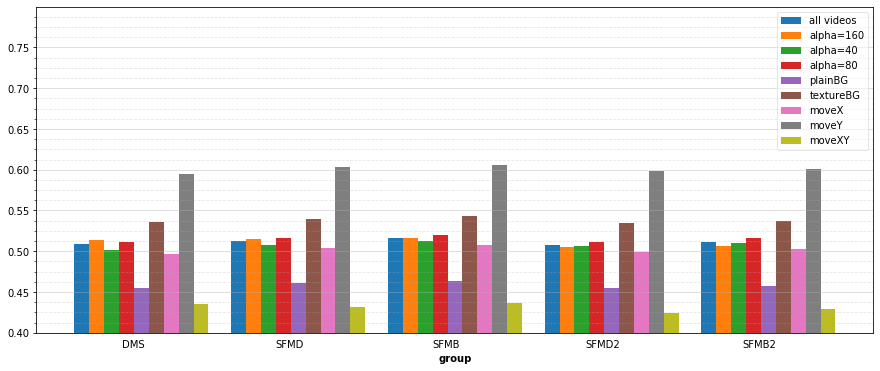

,DMS,SFMD,SFMD2,SFMB,SFMB2
all videos,22.5/0.693/0.704/12.9,22.8/0.679/0.707/15.3,22.6/0.676/0.698/14.9,22.9/0.683/0.712/15.5,22.7/0.679/0.703/15.1
alpha=160,22.9/0.709/0.714/11.9,23.1/0.692/0.715/13.9,22.8/0.685/0.699/13.3,23.1/0.694/0.718/13.9,22.8/0.686/0.702/13.2
alpha=40,22.2/0.675/0.691/13.8,22.7/0.662/0.692/16.9,22.6/0.663/0.692/16.4,22.8/0.667/0.699/17.2,22.7/0.667/0.697/16.6
alpha=80,22.4/0.695/0.708/13.1,22.5/0.685/0.713/15.2,22.4/0.679/0.705/15.0,22.6/0.688/0.719/15.4,22.5/0.683/0.711/15.4
plainBG,22.9/0.685/0.682/0.0,23.2/0.682/0.698/0.4,23.0/0.674/0.685/0.4,23.3/0.684/0.702/0.6,23.1/0.676/0.691/0.5
textureBG,22.4/0.697/0.716/19.4,22.5/0.678/0.711/22.8,22.4/0.676/0.705/22.1,22.6/0.683/0.716/22.9,22.5/0.680/0.709/22.4
moveX,22.8/0.694/0.701/9.4,23.2/0.687/0.711/11.5,23.1/0.684/0.704/11.0,23.3/0.691/0.717/11.6,23.2/0.687/0.710/11.1
moveY,23.9/0.765/0.788/23.0,24.3/0.757/0.792/26.1,24.2/0.754/0.786/25.6,24.4/0.759/0.795/26.2,24.2/0.756/0.789/25.7
moveXY,20.9/0.620/0.624/6.3,20.8/0.594/0.618/8.3,20.5/0.589/0.605/8.0,20.9/0.599/0.623/8.6,20.6/0.593/0.610/8.4


In [34]:
vnum_plainbg=[]
vnum_texturebg=[]
vnum_moveX=[]
vnum_moveY=[]
vnum_moveXY=[]
for i in range(27):
    if i<9:
        vnum_moveY.append(i)
    elif i<18:
        vnum_moveX.append(i)
    else:
        vnum_moveXY.append(i)
    if i%3==0:
        vnum_plainbg.append(i)
    else:
        vnum_texturebg.append(i)
idx_octave=[]
idx_quarter=[]
for i in range(108):
    if i//27%2==0:
        idx_octave.append(i)
    else:
        idx_quarter.append(i)
pbdf=pd.read_csv('SynFlowMap_from_DMS.csv')
pbhalfdf=pbdf[pbdf['alpha_2']==2]
pbdf=pbdf[pbdf['alpha_2']==1]
print(len(pbdf),len(pbhalfdf))

alphas=list(set(pbdf['dms_alpha'].tolist()))
res=pd.DataFrame(columns=['DMS PSNR','DMS SSIM','DMS MS_SSIM','DMS VMAF',
                          'SFMD PSNR','SFMD SSIM','SFMD MS_SSIM','SFMD VMAF',
                          'SFMD2 PSNR','SFMD2 SSIM','SFMD2 MS_SSIM','SFMD2 VMAF',
                          'SFMB PSNR','SFMB SSIM','SFMB MS_SSIM','SFMB VMAF',
                          'SFMB2 PSNR','SFMB2 SSIM','SFMB2 MS_SSIM','SFMB2 VMAF',
                          'scales','winsizes','bfilsize'])
print(pbdf.columns)

res.loc['all videos'] = getAvgMetrics(pbdf,pbhalfdf)

#alphas=alphas.sort()
for a in alphas:
    print('alpha=',a)
    pb1=pbdf[pbdf['dms_alpha']==a]
    pb2=pbhalfdf[pbhalfdf['dms_alpha']==a//2]
    res.loc['alpha='+str(a)]=getAvgMetrics(pb1,pb2)
    
for i in range(2):
    if i==0:
        var='plainBG'
        l=vnum_plainbg
    else:
        var='textureBG'
        l=vnum_texturebg
    print('exp=',var)
    pb1=pbdf[pbdf['video_num'].isin(l)]
    pb2=pbhalfdf[pbhalfdf['video_num'].isin(l)]

    res.loc[var]=getAvgMetrics(pb1,pb2)
    
for i in range(3):
    if i==0:
        var='moveX'
        l=vnum_moveX
    elif i==1:
        var='moveY'
        l=vnum_moveY
    else:
        var='moveXY'
        l=vnum_moveXY    
    print('exp=',var)    
    pb1=pbdf[pbdf['video_num'].isin(l)]
    pb2=pbhalfdf[pbhalfdf['video_num'].isin(l)]
    res.loc[var]=getAvgMetrics(pb1,pb2)
plotScores(res,miny=0.4,maxy=0.8,savename='SFM_vs_DMS.png')

res
(reformat(res))


27 27
Index(['Unnamed: 0', 'acc_alpha', 'acc_settings', 'alpha_2', 'best_OFwinsize',
       'best_bilatfil_size', 'best_scale', 'gt_file', 'mag_file', 'ms_ssim',
       'ms_ssim_best', 'ms_ssim_mag', 'orig_file', 'psnr', 'psnr_best',
       'psnr_mag', 'score', 'score_best', 'score_mag', 'scorebest_OFwinsize',
       'sfm_best_file', 'sfm_default_file', 'ssim', 'ssim_best', 'ssim_mag',
       'status', 'video_num', 'vmaf', 'vmaf_best', 'vmaf_mag'],
      dtype='object')
alpha= 16
alpha= 8
alpha= 4
exp= plainBG
exp= textureBG
exp= movingBG
exp= moveX
exp= moveY
exp= moveXY
[0 1 2 3 4]
[0.095, 1.095, 2.095, 3.095, 4.095]
[0.19, 1.19, 2.1900000000000004, 3.1900000000000004, 4.1899999999999995]
[0.28500000000000003, 1.285, 2.2850000000000006, 3.2850000000000006, 4.284999999999999]
[0.38, 1.38, 2.380000000000001, 3.380000000000001, 4.379999999999999]
[0.475, 1.4749999999999999, 2.475000000000001, 3.475000000000001, 4.474999999999999]
[0.57, 1.5699999999999998, 2.570000000000001, 3.570000000

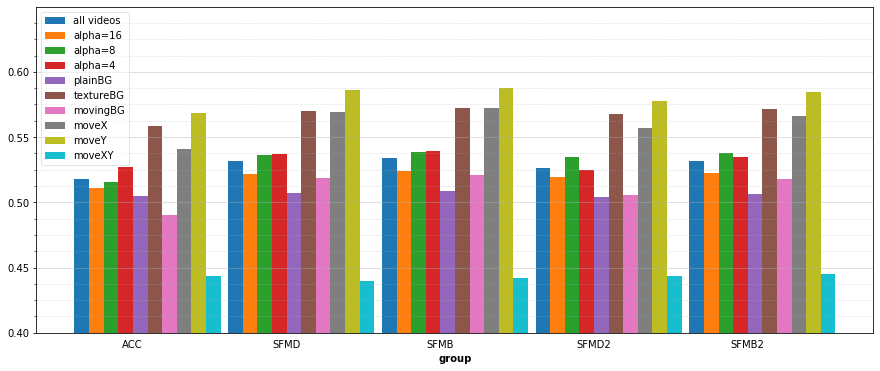

,ACC,SFMD,SFMD2,SFMB,SFMB2
all videos,23.2/0.721/0.717/11.6,22.7/0.714/0.715/16.6,22.6/0.713/0.715/15.0,22.8/0.716/0.717/16.9,22.7/0.715/0.717/16.3
alpha=16,23.6/0.734/0.721/7.7,23.0/0.723/0.717/12.5,22.9/0.722/0.715/12.0,23.0/0.725/0.719/13.0,23.0/0.724/0.717/12.7
alpha=8,22.5/0.704/0.705/13.7,22.0/0.704/0.707/19.8,22.0/0.703/0.705/19.4,22.1/0.706/0.709/20.1,22.1/0.705/0.707/20.3
alpha=4,23.5/0.724/0.724/13.2,23.2/0.715/0.721/17.6,23.0/0.713/0.726/13.5,23.2/0.718/0.723/17.8,23.1/0.717/0.728/16.0
plainBG,24.5/0.756/0.743/1.4,24.3/0.745/0.739/3.7,24.2/0.745/0.741/2.8,24.3/0.748/0.743/3.6,24.2/0.745/0.741/3.3
textureBG,22.7/0.722/0.714/23.9,22.0/0.709/0.709/29.0,22.0/0.710/0.712/28.2,22.0/0.711/0.711/29.5,22.0/0.712/0.713/29.0
movingBG,22.3/0.684/0.693/9.4,21.9/0.688/0.696/17.1,21.7/0.683/0.694/14.0,22.0/0.690/0.697/17.7,21.9/0.689/0.698/16.7
moveX,24.0/0.729/0.731/16.4,23.7/0.733/0.736/23.8,23.4/0.728/0.733/21.0,23.7/0.735/0.738/24.5,23.5/0.731/0.733/23.5
moveY,24.3/0.776/0.783/14.7,24.0/0.769/0.782/20.8,23.9/0.765/0.780/18.7,24.1/0.770/0.783/21.0,24.0/0.769/0.783/20.2
moveXY,21.3/0.658/0.637/3.6,20.5/0.641/0.626/5.3,20.6/0.645/0.633/5.3,20.6/0.644/0.630/5.3,20.6/0.646/0.635/5.4


In [35]:
vnum_plainbg=[]
vnum_texturebg=[]
vnum_movingbg=[]
vnum_moveX=[]
vnum_moveY=[]
vnum_moveXY=[]
for i in range(27):
    if i<9:
        vnum_moveY.append(i)
    elif i<18:
        vnum_moveX.append(i)
    else:
        vnum_moveXY.append(i)
    if i%3==0:
        vnum_plainbg.append(i)
    elif i%3==1:
        vnum_texturebg.append(i)
    else:
        vnum_movingbg.append(i)
idx_octave=[]
idx_quarter=[]
for i in range(108):
    if i//27%2==0:
        idx_octave.append(i)
    else:
        idx_quarter.append(i)
pbdf=pd.read_csv('SynFlowMap_from_ACC.csv')
pbhalfdf=pbdf[pbdf['alpha_2']==2]
pbdf=pbdf[pbdf['alpha_2']==1]
print(len(pbdf),len(pbhalfdf))

alphas=list(set(pbdf['acc_alpha'].tolist()))
res=pd.DataFrame(columns=['ACC PSNR','ACC SSIM','ACC MS_SSIM','ACC VMAF',
                          'SFMD PSNR','SFMD SSIM','SFMD MS_SSIM','SFMD VMAF',
                          'SFMD2 PSNR','SFMD2 SSIM','SFMD2 MS_SSIM','SFMD2 VMAF',
                          'SFMB PSNR','SFMB SSIM','SFMB MS_SSIM','SFMB VMAF',
                          'SFMB2 PSNR','SFMB2 SSIM','SFMB2 MS_SSIM','SFMB2 VMAF',
                          'scales','winsizes','bfilsize'])
print(pbdf.columns)

res.loc['all videos'] = getAvgMetrics(pbdf,pbhalfdf)

#alphas=alphas.sort()
for a in alphas:
    print('alpha=',a)
    pb1=pbdf[pbdf['acc_alpha']==a]
    pb2=pbhalfdf[pbhalfdf['acc_alpha']==a//2]
    res.loc['alpha='+str(a)]=getAvgMetrics(pb1,pb2)
    
for i in range(3):
    if i==0:
        var='plainBG'
        l=vnum_plainbg
    elif i==1:
        var='textureBG'
        l=vnum_texturebg
    else:
        var='movingBG'
        l=vnum_movingbg
    print('exp=',var)
    pb1=pbdf[pbdf['video_num'].isin(l)]
    pb2=pbhalfdf[pbhalfdf['video_num'].isin(l)]

    res.loc[var]=getAvgMetrics(pb1,pb2)
    
for i in range(3):
    if i==0:
        var='moveX'
        l=vnum_moveX
    elif i==1:
        var='moveY'
        l=vnum_moveY
    else:
        var='moveXY'
        l=vnum_moveXY    
    print('exp=',var)    
    pb1=pbdf[pbdf['video_num'].isin(l)]
    pb2=pbhalfdf[pbhalfdf['video_num'].isin(l)]
    res.loc[var]=getAvgMetrics(pb1,pb2)
plotScores(res,maxy=0.65,savename='SFM_vs_ACC.png')
res
(reformat(res))


27 27
Index(['Unnamed: 0', 'alpha_2', 'best_OFwinsize', 'best_bilatfil_size',
       'best_scale', 'dmd_alpha', 'dmd_settings', 'gt_file', 'mag_file',
       'ms_ssim', 'ms_ssim_best', 'ms_ssim_mag', 'orig_file', 'psnr',
       'psnr_best', 'psnr_mag', 'score', 'score_best', 'score_mag',
       'scorebest_OFwinsize', 'sfm_best_file', 'sfm_default_file', 'ssim',
       'ssim_best', 'ssim_mag', 'status', 'video_num', 'vmaf', 'vmaf_best',
       'vmaf_mag'],
      dtype='object')
alpha= 16
alpha= 8
alpha= 4
exp= plainBG
exp= textureBG
exp= movingBG
exp= moveX
exp= moveY
exp= moveXY
[0 1 2 3 4]
[0.095, 1.095, 2.095, 3.095, 4.095]
[0.19, 1.19, 2.1900000000000004, 3.1900000000000004, 4.1899999999999995]
[0.28500000000000003, 1.285, 2.2850000000000006, 3.2850000000000006, 4.284999999999999]
[0.38, 1.38, 2.380000000000001, 3.380000000000001, 4.379999999999999]
[0.475, 1.4749999999999999, 2.475000000000001, 3.475000000000001, 4.474999999999999]
[0.57, 1.5699999999999998, 2.570000000000001, 3.57

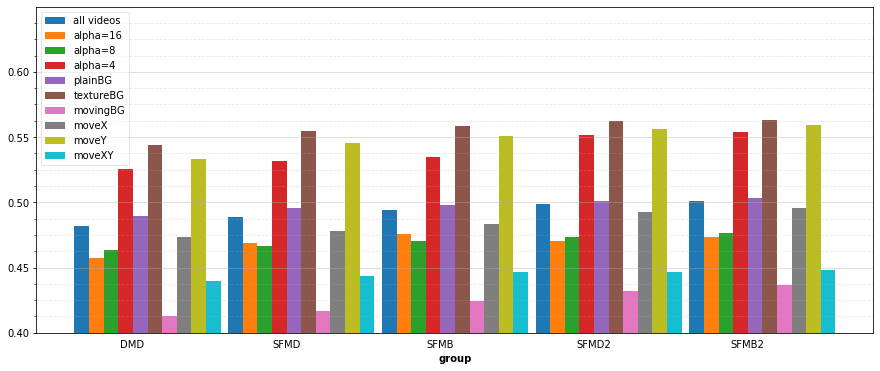

,DMD,SFMD,SFMD2,SFMB,SFMB2
all videos,21.7/0.678/0.673/9.6,22.0/0.672/0.682/11.3,22.2/0.680/0.691/12.4,22.1/0.676/0.689/11.6,22.3/0.682/0.695/12.7
alpha=16,21.0/0.671/0.626/7.6,21.5/0.668/0.650/9.0,21.5/0.670/0.649/9.2,21.8/0.674/0.663/9.1,21.7/0.673/0.656/9.1
alpha=8,20.8/0.640/0.647/10.4,20.9/0.630/0.648/12.0,21.1/0.637/0.662/12.2,21.0/0.634/0.655/12.2,21.2/0.640/0.666/12.3
alpha=4,23.3/0.722/0.747/10.7,23.5/0.719/0.748/12.7,24.0/0.732/0.762/16.0,23.5/0.721/0.750/13.5,24.0/0.733/0.762/16.6
plainBG,23.7/0.737/0.723/0.8,24.0/0.738/0.736/1.2,24.1/0.741/0.742/2.1,24.1/0.741/0.742/1.2,24.2/0.743/0.746/2.1
textureBG,21.1/0.707/0.696/22.9,21.6/0.696/0.699/26.8,21.8/0.707/0.709/27.1,21.7/0.702/0.705/26.9,21.9/0.707/0.711/27.1
movingBG,20.4/0.589/0.601/4.9,20.4/0.583/0.610/5.8,20.7/0.592/0.622/8.2,20.5/0.586/0.620/6.7,20.8/0.594/0.628/8.8
moveX,21.9/0.646/0.651/12.4,22.0/0.636/0.651/14.7,22.4/0.647/0.664/16.7,22.1/0.641/0.660/15.0,22.5/0.648/0.667/17.1
moveY,22.6/0.742/0.736/12.3,23.1/0.741/0.753/14.1,23.3/0.750/0.763/15.6,23.2/0.746/0.761/14.6,23.4/0.753/0.768/15.8
moveXY,20.7/0.646/0.633/4.0,20.8/0.640/0.641/5.0,20.9/0.643/0.646/5.0,20.9/0.643/0.647/5.1,20.9/0.644/0.649/5.1


In [36]:
vnum_plainbg=[]
vnum_texturebg=[]
vnum_movingbg=[]
vnum_moveX=[]
vnum_moveY=[]
vnum_moveXY=[]
for i in range(27):
    if i<9:
        vnum_moveY.append(i)
    elif i<18:
        vnum_moveX.append(i)
    else:
        vnum_moveXY.append(i)
    if i%3==0:
        vnum_plainbg.append(i)
    elif i%3==1:
        vnum_texturebg.append(i)
    else:
        vnum_movingbg.append(i)
idx_octave=[]
idx_quarter=[]
for i in range(108):
    if i//27%2==0:
        idx_octave.append(i)
    else:
        idx_quarter.append(i)
pbdf=pd.read_csv('SynFlowMap_from_DMD.csv')
pbhalfdf=pbdf[pbdf['alpha_2']==2]
pbdf=pbdf[pbdf['alpha_2']==1]
print(len(pbdf),len(pbhalfdf))

alphas=list(set(pbdf['dmd_alpha'].tolist()))
res=pd.DataFrame(columns=['DMD PSNR','DMD SSIM','DMD MS_SSIM','DMD VMAF',
                          'SFMD PSNR','SFMD SSIM','SFMD MS_SSIM','SFMD VMAF',
                          'SFMD2 PSNR','SFMD2 SSIM','SFMD2 MS_SSIM','SFMD2 VMAF',
                          'SFMB PSNR','SFMB SSIM','SFMB MS_SSIM','SFMB VMAF',
                          'SFMB2 PSNR','SFMB2 SSIM','SFMB2 MS_SSIM','SFMB2 VMAF',
                          'scales','winsizes','bfilsize'])
print(pbdf.columns)

res.loc['all videos'] = getAvgMetrics(pbdf,pbhalfdf)

#alphas=alphas.sort()
for a in alphas:
    print('alpha=',a)
    pb1=pbdf[pbdf['dmd_alpha']==a]
    pb2=pbhalfdf[pbhalfdf['dmd_alpha']==a//2]
    res.loc['alpha='+str(a)]=getAvgMetrics(pb1,pb2)
    
for i in range(3):
    if i==0:
        var='plainBG'
        l=vnum_plainbg
    elif i==1:
        var='textureBG'
        l=vnum_texturebg
    else:
        var='movingBG'
        l=vnum_movingbg
    print('exp=',var)
    pb1=pbdf[pbdf['video_num'].isin(l)]
    pb2=pbhalfdf[pbhalfdf['video_num'].isin(l)]

    res.loc[var]=getAvgMetrics(pb1,pb2)
    
for i in range(3):
    if i==0:
        var='moveX'
        l=vnum_moveX
    elif i==1:
        var='moveY'
        l=vnum_moveY
    else:
        var='moveXY'
        l=vnum_moveXY    
    print('exp=',var)    
    pb1=pbdf[pbdf['video_num'].isin(l)]
    pb2=pbhalfdf[pbhalfdf['video_num'].isin(l)]
    res.loc[var]=getAvgMetrics(pb1,pb2)
plotScores(res,maxy=0.65,savename='SFM_vs_DMD.png')
res
(reformat(res))
